In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
train_dir = '/content/drive/MyDrive/varun/train4'
validation_dir = '/content/drive/MyDrive/varun/test4'

num_classes = 2

train_batch_size = 32
validation_batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=train_batch_size,
    class_mode='Binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=validation_batch_size,
    class_mode='Binary'
)


Found 1488 images belonging to 2 classes.
Found 388 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 model with pretrained weights, excluding the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Ensure that the base model layers are not trainable
base_model.trainable = False

# Build the classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),  # Additional dense layer
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    tf.keras.layers.Dense(5, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                           

Epoch 1/10
47/47 [==============================] - 357s 7s/step - loss: 0.4668 - accuracy: 0.8138 - val_loss: 0.2415 - val_accuracy: 0.9021
Epoch 2/10
47/47 [==============================] - 29s 611ms/step - loss: 0.2826 - accuracy: 0.8858 - val_loss: 0.2180 - val_accuracy: 0.9304
Epoch 3/10
47/47 [==============================] - 28s 591ms/step - loss: 0.2856 - accuracy: 0.8837 - val_loss: 0.2615 - val_accuracy: 0.8840
Epoch 4/10
47/47 [==============================] - 28s 602ms/step - loss: 0.2702 - accuracy: 0.8938 - val_loss: 0.2000 - val_accuracy: 0.9253
Epoch 5/10
47/47 [==============================] - 29s 627ms/step - loss: 0.2324 - accuracy: 0.9066 - val_loss: 0.2554 - val_accuracy: 0.8969
Epoch 6/10
47/47 [==============================] - 28s 604ms/step - loss: 0.2363 - accuracy: 0.8999 - val_loss: 0.1828 - val_accuracy: 0.9433
Epoch 7/10
47/47 [==============================] - 28s 597ms/step - loss: 0.1994 - accuracy: 0.9200 - val_loss: 0.1716 - val_accuracy: 0.9459
E

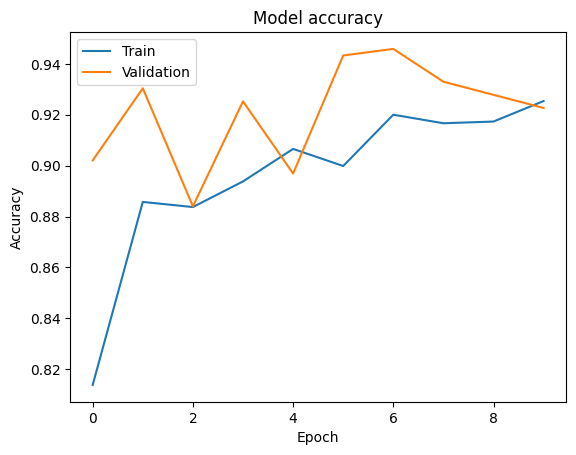

In [ ]:
import matplotlib.pyplot as plt

epochs = 10

# Train the model using data generators
history = model.fit(
    train_generator,  # Use the train_generator for training data
    validation_data=validation_generator,  # Use the validation_generator for validation data
    epochs=epochs,
    verbose=1
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('Model_Final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


13/13 [==============================] - 2s 156ms/step - loss: 0.2025 - accuracy: 0.9227
Test Loss: 0.2024824172258377, Test Accuracy: 0.9226804375648499


In [ ]:
from keras.models import load_model

# Load the model from the saved h5 file
loaded_model = load_model('Model_Final.h5')




In [ ]:
def predict_image(model, img_path):
    # Preprocess the image
    preprocessed_img = prepare_image(img_path)

    # Make predictions
    prediction = model.predict(preprocessed_img)

    # Retrieve the indices of the highest probability class
    predicted_class_indices = np.argmax(prediction, axis=1)

    # Map indices to class labels
    labels = (train_generator.class_indices)
    labels = dict((v, k) for k, v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]

    return predictions

# Path to a new image for prediction
new_image_path = '/content/24328_left.png'

# Call the function with your model and the image path
predictions = predict_image(model, new_image_path)

print("Predictions: ", predictions)


1/1 [==============================] - 0s 23ms/step
Predictions:  ['ndr']
